In [5]:
# Bunch of imports and setup
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
# Train and test loader
import torch
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5)) ])
trainset    = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)
testset    = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=True)


def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100.0%


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



102.8%


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100.0%


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



112.7%
/home/tom/anaconda3/envs/poggers/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



<div style=\"background:#222222; color:#ffffff; padding:20px\">
      <h3 style=\"color:#01ff84; margin-top:4px\">Exercise 1:</h3>
      <p>Now it's your turn to build a simple network, use any method I've covered so far. In the next notebook, you'll learn how to train a network so it can make good predictions.</p>
      <p>Build a network to classify the MNIST images with 3 hidden layers. Use 16 units in the first hidden layer, 32 units in the second layer, and 8 units in the third layer. Each hidden layer should have a ReLU activation function, and use softmax on the output layer.</p>
    <div>

In [7]:
input_size = 784
hidden_sizes =  [16, 32, 8]
output_size = 10
model = nn.Sequential(
        OrderedDict([
            ('First_Layer', nn.Linear(input_size, hidden_sizes[0])),
            ('First_ReLU', nn.ReLU()),
            ('Second_Layer', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
            ('Second_ReLU', nn.ReLU()),
            ('Third_Layer', nn.Linear(hidden_sizes[1], hidden_sizes[2])),
            ('Third_ReLU', nn.ReLU()),
            ('Output_Layer', nn.Linear(hidden_sizes[2], output_size)),
            ('Output_ReLU', nn.ReLU()),
            ('Softmax_Output', nn.Softmax(dim=1)),
            # I think the above works? if not:
            # ('Softmax_Output', F.softmax(dim=1)),
        ])
    )

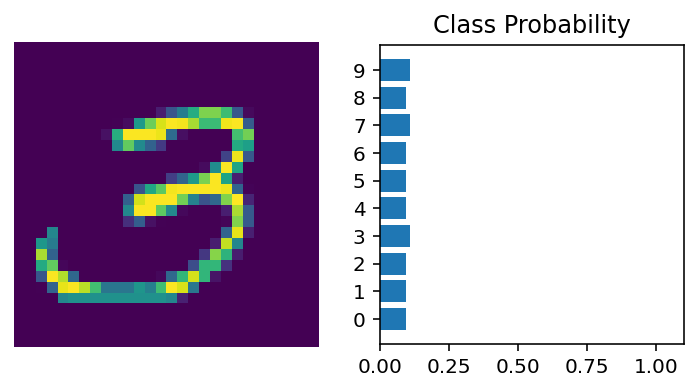

In [8]:
# Run this cell with your model to make sure it works
# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images = images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

<div style=\"background:#222222; color:#ffffff; padding:20px\">
      <h3 style=\"color:#01ff84; margin-top:4px\">Exercise 2:</h3>
      <p>Train your network implementing the Pytorch training loop and <strong style=\"color:#01ff84\">after each epoch, use the model for predicting the test (validation) MNIST data.</strong></p>
      <p>Note: If your model does not fit with the final softmax layer, you can remove this layer.</p>
      <p>Hint: <a href=\"https://discuss.pytorch.org/t/training-loop-checking-validation-accuracy/78399\">Training loop checking validation accuracy
    </a></p>
      <p>Research about <code>model.train()</code>, <code>model.eval()</code> and <code>with torch.no_grad()</code> in Pytorch.
    <div>

In [56]:
## TODO: Your training loop here
input_size = 784
hidden_sizes =  [128, 64]
output_size = 10
model = nn.Sequential(
    OrderedDict([
        ('First_Layer', nn.Linear(input_size, hidden_sizes[0])),
        ('First_ReLU', nn.ReLU()),
        ('Second_Layer', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
        ('Second_ReLU', nn.ReLU()),
        ('Final_Layer', nn.Linear(hidden_sizes[1], output_size)),
        ('Final_ReLU', nn.ReLU())
    ])
)

# Model parameters
optimiser = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

training_epochs = 3
print_every = 500 # Just so we have a manageable amount of text displayed

for epoch in range(training_epochs):
    model.train()
    running_loss = 0
    print(f"Epoch {epoch+1} / {training_epochs}")

    for cycle, (images, labels) in enumerate(iter(trainloader)):
        # Flatten the images for our network
        images = images.reshape(16, 784)
        # Zero out the gradients
        optimiser.zero_grad()
        # Make a guess by passing an image forward through the network
        model_guess = model.forward(images)
        # Calculate how good/bad that guess is
        loss_value = criterion(model_guess, labels)
        # Backpropogate to see how we need to adjust the weights
        loss_value.backward()
        # Adjust the weights
        optimiser.step()

        # Keep track of the loss for our human eyes to see
        running_loss += loss_value.item()

        if cycle % print_every == 0:
            print(f"Training cycle: {cycle}\t Avg. Loss: {running_loss/print_every:.4f}")
            running_loss = 0

    # Eval loop here
    # Eval Loop
    # There are 10,000 samples in the test set
    model.eval()
    with torch.no_grad():
        correct_guesses = 0
        for test_images, test_labels in iter(testloader):
            test_images = test_images.reshape(16, 784)
            test_guess = model.forward(test_images)
            loss_value = criterion(test_guess, test_labels)
            # print("="*50)
            # print(f"Model predicions are this size: {test_guess.size()}")
            index = 0
            for guess in test_guess:

                # print("I am the guess values for one image")
                guess = F.softmax(guess, dim=1)
                # print(guess)
                prediction = 0
                for value in guess:
                    if value == guess.max():
                        break
                    else:
                        prediction += 1
                # print(f"My prediction is: {prediction}")
                # print(f"Actual value: {test_labels[index]}")

                if prediction == test_labels[index]:
                    correct_guesses += 1
                index += 1
        print("="*50)
        print(f"Correct Guesses: {correct_guesses} / 10,000")
        accuracy = correct_guesses / 100
        print(f"Accuracy: {accuracy}%")
        print("="*50)
        model.train()

print("*"*50)
print("DONE")

Epoch 1 / 3
Training cycle: 0	 Avg. Loss: 0.0046
Training cycle: 500	 Avg. Loss: 1.9237
Training cycle: 1000	 Avg. Loss: 1.1629
Training cycle: 1500	 Avg. Loss: 0.8964
Training cycle: 2000	 Avg. Loss: 0.8203
Training cycle: 2500	 Avg. Loss: 0.7901
Training cycle: 3000	 Avg. Loss: 0.7860
Training cycle: 3500	 Avg. Loss: 0.7508


C:\Users\tom\AppData\Local\Temp/ipykernel_7256/2452867569.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  guess = F.softmax(guess)


Correct Guesses: 7393 / 10,000
Accuracy: 0.7393
Epoch 2 / 3
Training cycle: 0	 Avg. Loss: 0.0006
Training cycle: 500	 Avg. Loss: 0.7523
Training cycle: 1000	 Avg. Loss: 0.6493
Training cycle: 1500	 Avg. Loss: 0.5243
Training cycle: 2000	 Avg. Loss: 0.4969
Training cycle: 2500	 Avg. Loss: 0.4834
Training cycle: 3000	 Avg. Loss: 0.4809
Training cycle: 3500	 Avg. Loss: 0.4834
Correct Guesses: 8451 / 10,000
Accuracy: 0.8451
Epoch 3 / 3
Training cycle: 0	 Avg. Loss: 0.0004
Training cycle: 500	 Avg. Loss: 0.4381
Training cycle: 1000	 Avg. Loss: 0.4428
Training cycle: 1500	 Avg. Loss: 0.4461
Training cycle: 2000	 Avg. Loss: 0.4318
Training cycle: 2500	 Avg. Loss: 0.4297
Training cycle: 3000	 Avg. Loss: 0.4165
Training cycle: 3500	 Avg. Loss: 0.4044
Correct Guesses: 8599 / 10,000
Accuracy: 0.8599
**************************************************
DONE


In [54]:
# Eval Loop
# There are 10,000 samples in the test set
model.eval()
with torch.no_grad():
    correct_guesses = 0
    for test_images, test_labels in iter(testloader):
        test_images = test_images.reshape(16, 784)
        test_guess = model.forward(test_images)
        loss_value = criterion(test_guess, test_labels)
        # print("="*50)
        # print(f"Model predicions are this size: {test_guess.size()}")
        index = 0
        for guess in test_guess:

            # print("I am the guess values for one image")
            guess = F.softmax(guess, dim=1)
            # print(guess)
            prediction = 0
            for value in guess:
                if value == guess.max():
                    break
                else:
                    prediction += 1
            # print(f"My prediction is: {prediction}")
            # print(f"Actual value: {test_labels[index]}")

            if prediction == test_labels[index]:
                correct_guesses += 1
            index += 1
    print("="*50)
    print(f"Correct Guesses: {correct_guesses} / 10,000")
    accuracy = correct_guesses / 100
    print(f"Accuracy: {accuracy}%")
    print("="*50)
model.train()


C:\Users\tom\AppData\Local\Temp/ipykernel_7256/855075697.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  guess = F.softmax(guess)


Correct Guesses: 9453 / 10,000
Accuracy: 0.9453


<div style="background:#222222; color:#ffffff; padding:20px">
  <h3 style="color:#01ff84; margin-top:4px">Exercise 3:</h3>
  <p>Write the code for adding <strong style="color:#01ff84">Early Stopping with patience = 2</strong> to the training loop from scratch.</p>
  <p><strong style="color:#01ff84">Hint:</strong> Monitor the Validation loss every epoch, and if in 2 epochs, the validation loss does not improve, stop the training loop with <code>break</code>.</p>
<div>

In [8]:
"""
For this exercise, we need to keep track of the loss in each epoch, and stop the training process if the algorithm isn't improving

"""
# Copied from above

input_size = 784
hidden_sizes =  [128, 64]
output_size = 10
model = nn.Sequential(
    OrderedDict([
        ('First_Layer', nn.Linear(input_size, hidden_sizes[0])),
        ('First_ReLU', nn.ReLU()),
        ('Second_Layer', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
        ('Second_ReLU', nn.ReLU()),
        ('Final_Layer', nn.Linear(hidden_sizes[1], output_size)),
        ('Final_ReLU', nn.ReLU())
    ])
)

# Model parameters
optimiser = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss()

training_epochs = 100
print_every = 1000 # Just so we have a manageable amount of text displayed
previous_loss = 0

for epoch in range(training_epochs):
    model.train()
    running_loss = 0
    print(f"Epoch {epoch+1} / {training_epochs}")

    for cycle, (images, labels) in enumerate(iter(trainloader)):
        # Flatten the images for our network
        images = images.reshape(16, 784)
        # Zero out the gradients
        optimiser.zero_grad()
        # Make a guess by passing an image forward through the network
        model_guess = model.forward(images)
        # Calculate how good/bad that guess is
        loss_value = criterion(model_guess, labels)
        # Backpropogate to see how we need to adjust the weights
        loss_value.backward()
        # Adjust the weights
        optimiser.step()

        # Keep track of the loss for our human eyes to see
        running_loss += loss_value.item()

        if cycle % print_every == 0:
            print(f"Training cycle: {cycle}\t Avg. Loss: {running_loss/print_every:.4f}")
            running_loss = 0

    # Eval loop here
    # Eval Loop
    # There are 10,000 samples in the test set
    epoch_loss = 0
    model.eval()
    with torch.no_grad():
        for test_images, test_labels in iter(testloader):
            test_images = test_images.reshape(16, 784)
            test_guess = model.forward(test_images)
            loss_value = criterion(test_guess, test_labels)
            epoch_loss += loss_value
 
        print("="*50)
        print(f"Loss this validation epoch: {epoch_loss}")
        if previous_loss != 0:
            print(f"Previous loss: {previous_loss}")
            if previous_loss <= epoch_loss:
                print("Model is not improving, exiting...")
                print("@"*50)
                break
        previous_loss = epoch_loss
        model.train()

print("*"*50)
print("DONE")

Epoch 1 / 10
Training cycle: 0	 Avg. Loss: 0.0046
Training cycle: 500	 Avg. Loss: 2.0051
Training cycle: 1000	 Avg. Loss: 1.3252
Training cycle: 1500	 Avg. Loss: 1.1044
Training cycle: 2000	 Avg. Loss: 1.0250
Training cycle: 2500	 Avg. Loss: 0.8694
Training cycle: 3000	 Avg. Loss: 0.7977
Training cycle: 3500	 Avg. Loss: 0.7592
Loss this validation epoch: 448.1414489746094
Epoch 2 / 10
Training cycle: 0	 Avg. Loss: 0.0021
Training cycle: 500	 Avg. Loss: 0.7141
Training cycle: 1000	 Avg. Loss: 0.7117
Training cycle: 1500	 Avg. Loss: 0.7102
Training cycle: 2000	 Avg. Loss: 0.6936
Training cycle: 2500	 Avg. Loss: 0.6983
Training cycle: 3000	 Avg. Loss: 0.6926
Training cycle: 3500	 Avg. Loss: 0.6664
Loss this validation epoch: 405.9627685546875
Previous loss: 448.1414489746094
Epoch 3 / 10
Training cycle: 0	 Avg. Loss: 0.0007
Training cycle: 500	 Avg. Loss: 0.6371
Training cycle: 1000	 Avg. Loss: 0.6578
Training cycle: 1500	 Avg. Loss: 0.6461
Training cycle: 2000	 Avg. Loss: 0.6424
Training